# Regresión

### Importación de bibliotecas requeridas

In [8]:
# Cargar bibliotecas
import pandas as pd
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Diabetes dataset

In [10]:
# Base de datos de diabetes de la India Pima
# Predecir la aparición de diabetes con base en medidas de diagnóstico
# https://www.kaggle.com/uciml/pima-indians-diabetes-database (descárguelo)

# Cargar conjunto de datos
pima = pd.read_csv("diabetes.csv")

In [11]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
pima.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df_2 = pima[pima['Outcome']==1.0];
df_2 = df_2.iloc[:, 0:-1]

In [14]:
import statsmodels.api as sm

## Construya un modelo de regresión lineal simple donde el nivel de insulina se explique por el nivel de glucosa del paciente.

independent = 'Glucose'
feature_cols = [independent]
X = df_2[feature_cols] # Características (variables independientes)
y = df_2.Insulin # Variable objetivo

## Añade intercepto/constante
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     19.50
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.46e-05
Time:                        03:07:21   Log-Likelihood:                -1692.1
No. Observations:                 268   AIC:                             3388.
Df Residuals:                     266   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.9798     37.214     -1.612      0.108    -133.251      13.292
Glucose        1.1349      0.257      4.416      0.000       0.629       1.641
==============================================================================
Omnibus:                       92.767   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.373
Skew:                           1.578   Prob(JB):                     5.80e-56
Kurtosis:                       6.581   Cond. No.                         658.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Gráficos de residuos

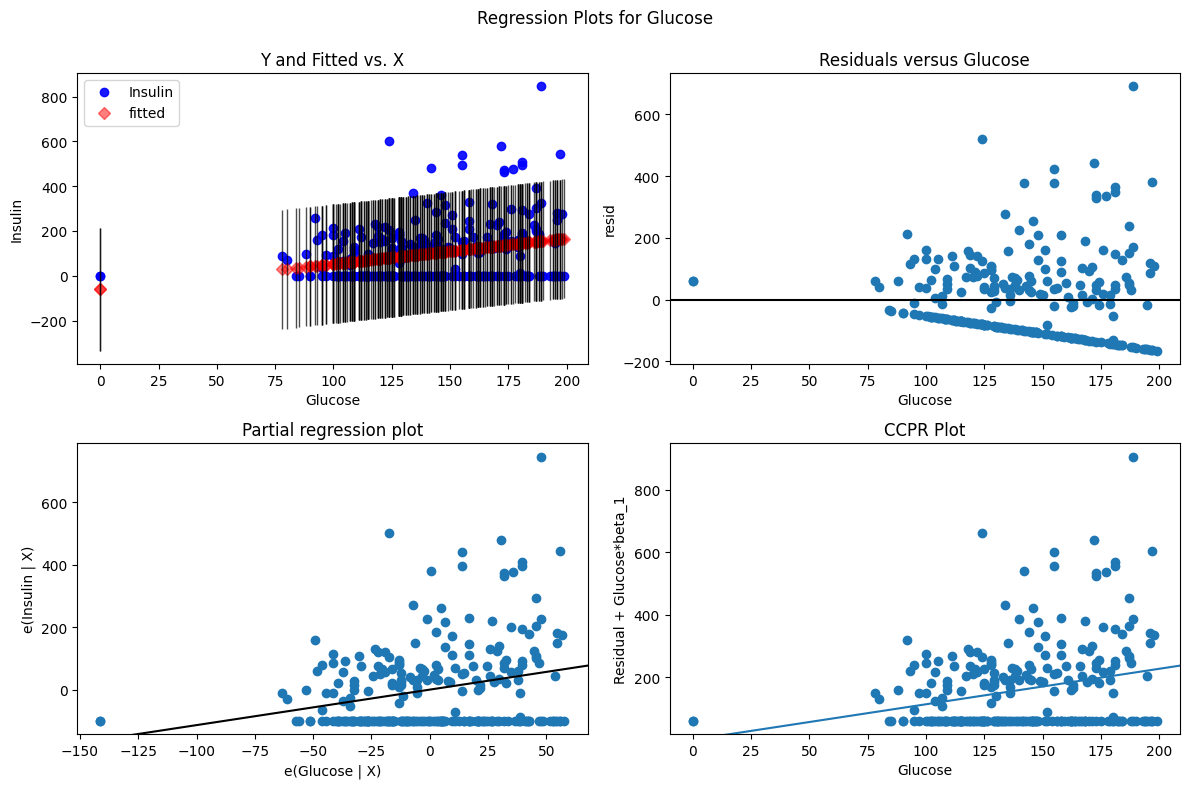

In [15]:
## Grafica los residuos del modelo
## https://www.statsmodels.org/v0.10.2/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html
## https://www.statsmodels.org/devel/examples/notebooks/generated/regression_plots.html

# Define el tamaño de la figura
fig = plt.figure(figsize=(12,8))

# Produce gráficas de regresión
fig = sm.graphics.plot_regress_exog(model, independent, fig=fig)

#### Responda las siguientes preguntas:
- ¿El modelo muestra homocedasticidad?

*La dispersión de los residuos aumenta a medida que aumenta la glucosa, indicando un patrón de forma de abanico, el modelo no muestra homocedasticidad.*

### Práctica 2: Modelos de regresión simple
- Entrene otros cuatro modelos de regresión simple (IMC, Edad, Grosor de la piel, Función Pedigrí de la Diabetes)
- Dibuje los residuos de cada modelo
- Elija el mejor modelo


In [16]:
## Entrene el modelo usando el IMC para predecir la insulina.

independent = 'BMI'
feature_cols = [independent]
X = df_2[feature_cols] # Características (variables independientes)
y = df_2.Insulin # Variable objetivo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8104
Date:                Tue, 29 Apr 2025   Prob (F-statistic):              0.369
Time:                        03:07:26   Log-Likelihood:                -1701.2
No. Observations:                 268   AIC:                             3406.
Df Residuals:                     266   BIC:                             3414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.3523     41.948      1.510      0.132     -19.240     145.944
BMI            1.0524      1.169      0.900      0.369      -1.249       3.354
==============================================================================
Omnibus:                      112.049   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              367.700
Skew:                           1.848   Prob(JB):                     1.43e-80
Kurtosis:                       7.390   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

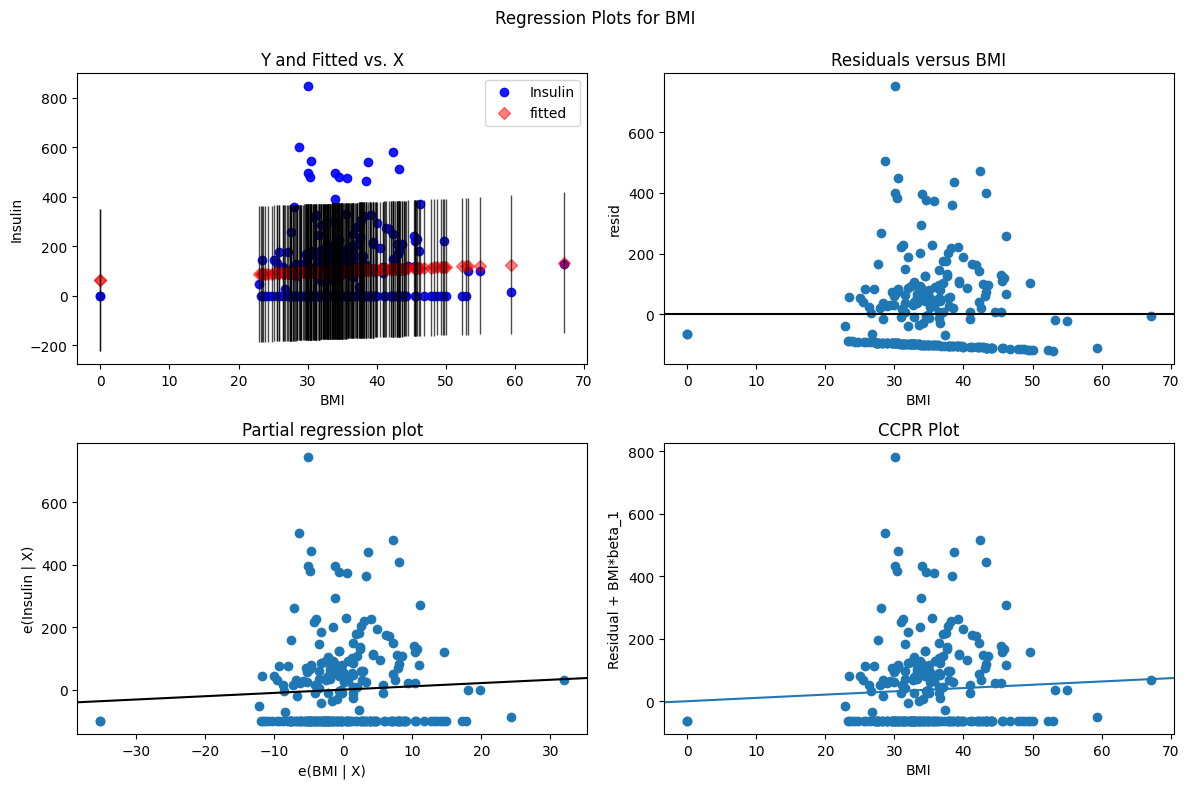

In [17]:
## Dibuje los residuos del modelo que usa el IMC para predecir la insulina.

# Define el tamaño de la figura
fig = plt.figure(figsize=(12,8))

# Produce gráficas de regresión
fig = sm.graphics.plot_regress_exog(model, independent, fig=fig)


In [18]:
## Entrene el modelo usando la Edad para predecir la insulina.

independent = 'Age'
feature_cols = [independent]
X = df_2[feature_cols] # Características (variables independientes)
y = df_2.Insulin # Variable objetivo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1526
Date:                Tue, 29 Apr 2025   Prob (F-statistic):              0.696
Time:                        03:07:31   Log-Likelihood:                -1701.5
No. Observations:                 268   AIC:                             3407.
Df Residuals:                     266   BIC:                             3414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.1133     29.956      2.975      0.003      30.131     148.095
Age            0.3028      0.775      0.391      0.696      -1.223       1.829
==============================================================================
Omnibus:                      108.908   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.696
Skew:                           1.816   Prob(JB):                     1.72e-74
Kurtosis:                       7.151   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

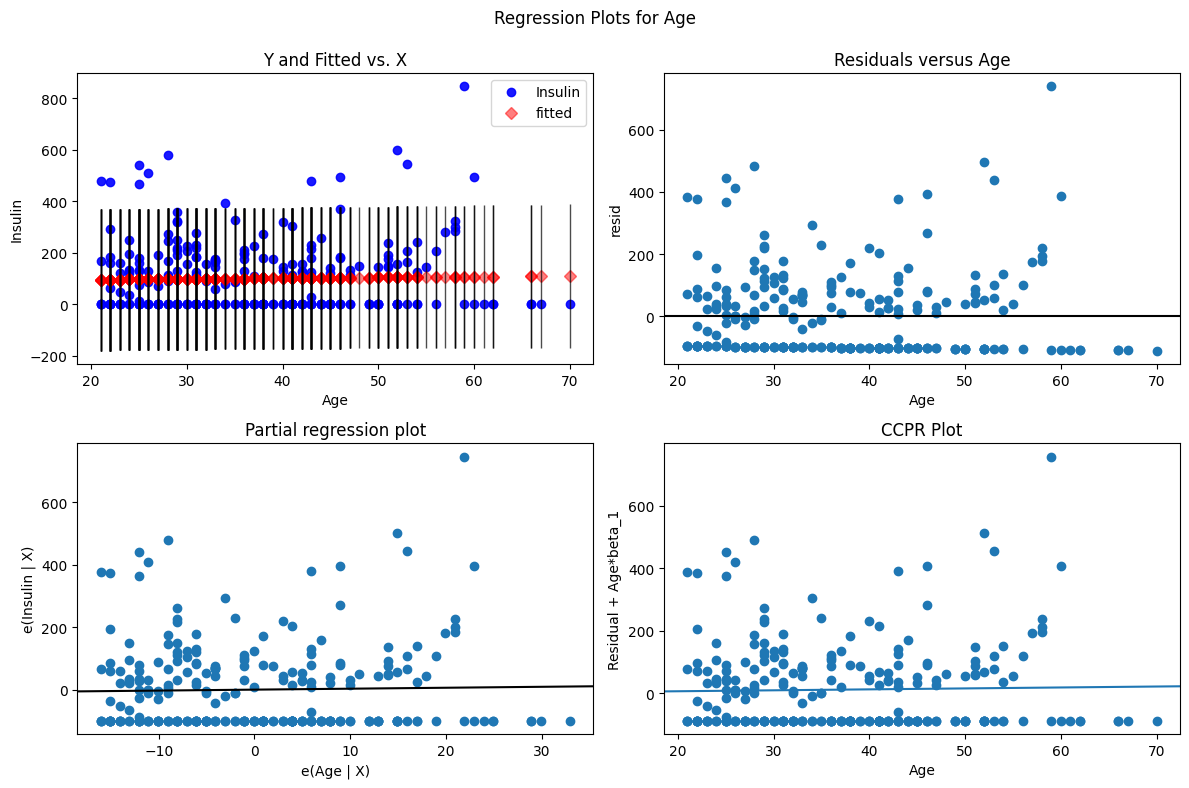

In [19]:
## Dibuje los residuos del modelo que usa la Edad para predecir la insulina.

# Define el tamaño de la figura
fig = plt.figure(figsize=(12,8))

# Produce gráficas de regresión
fig = sm.graphics.plot_regress_exog(model, independent, fig=fig)

In [20]:
## Entrene el modelo usando el Grosor de la piel para predecir la insulina.

independent = 'SkinThickness'
feature_cols = [independent]
X = df_2[feature_cols] # Características (variables independientes)
y = df_2.Insulin # Variable objetivo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     70.05
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           3.32e-15
Time:                        03:07:35   Log-Likelihood:                -1670.3
No. Observations:                 268   AIC:                             3345.
Df Residuals:                     266   BIC:                             3352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            20.9551     12.124      1.728      0.085      -2.915      44.826
SkinThickness     3.5815      0.428      8.369      0.000       2.739       4.424
==============================================================================
Omnibus:                      121.903   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              644.068
Skew:                           1.797   Prob(JB):                    1.39e-140
Kurtosis:                       9.691   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

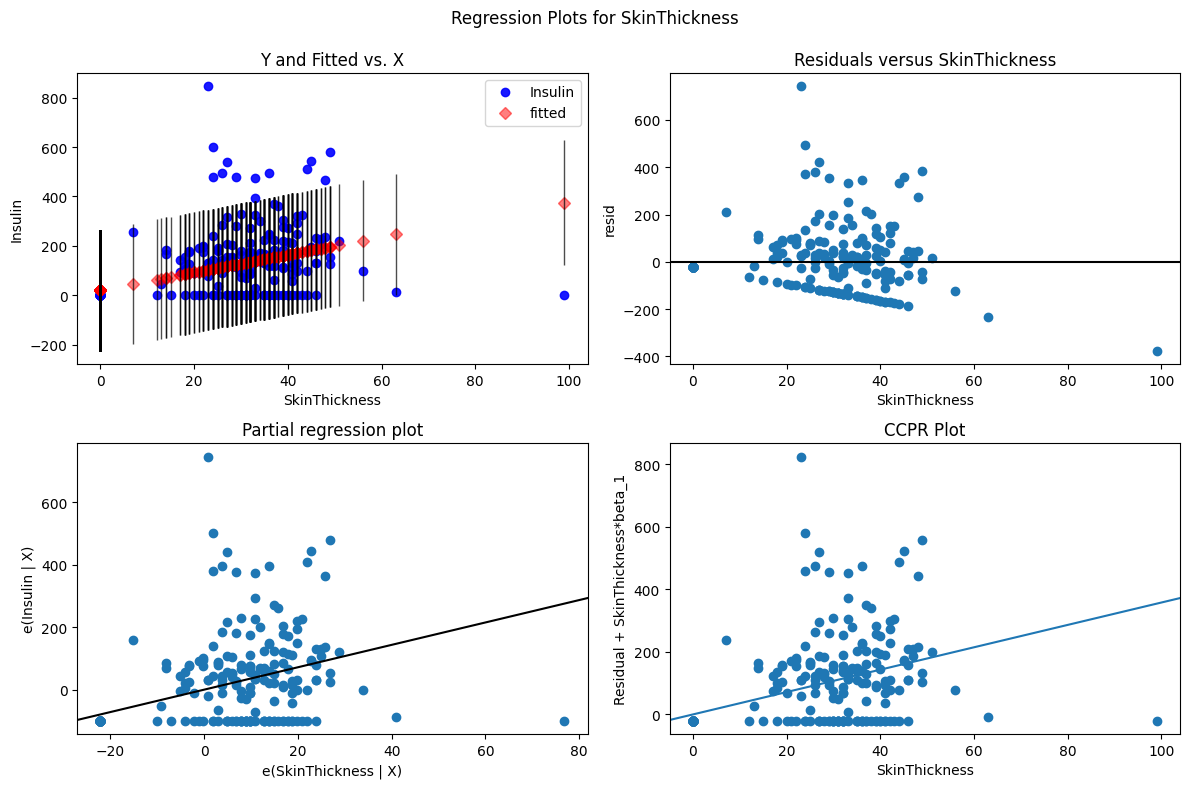

In [21]:
## Dibuje los residuos del modelo que usa el Grosor de la piel para predecir la insulina.

# Define el tamaño de la figura
fig = plt.figure(figsize=(12,8))

# Produce gráficas de regresión
fig = sm.graphics.plot_regress_exog(model, independent, fig=fig)

In [22]:
## Entrene el modelo usando DiabetesPedigreeFunction para predecir la insulina.

independent = 'DiabetesPedigreeFunction'
feature_cols = [independent]
X = df_2[feature_cols] # Características (variables independientes)
y = df_2.Insulin # Variable objetivo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.773
Date:                Tue, 29 Apr 2025   Prob (F-statistic):             0.0971
Time:                        03:07:38   Log-Likelihood:                -1700.2
No. Observations:                 268   AIC:                             3404.
Df Residuals:                     266   BIC:                             3412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       79.5107     15.090      5.269      0.000      49.799     109.223
DiabetesPedigreeFunction    37.8294     22.719      1.665      0.097      -6.903      82.562
==============================================================================
Omnibus:                      114.232   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              386.080
Skew:                           1.874   Prob(JB):                     1.46e-84
Kurtosis:                       7.531   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

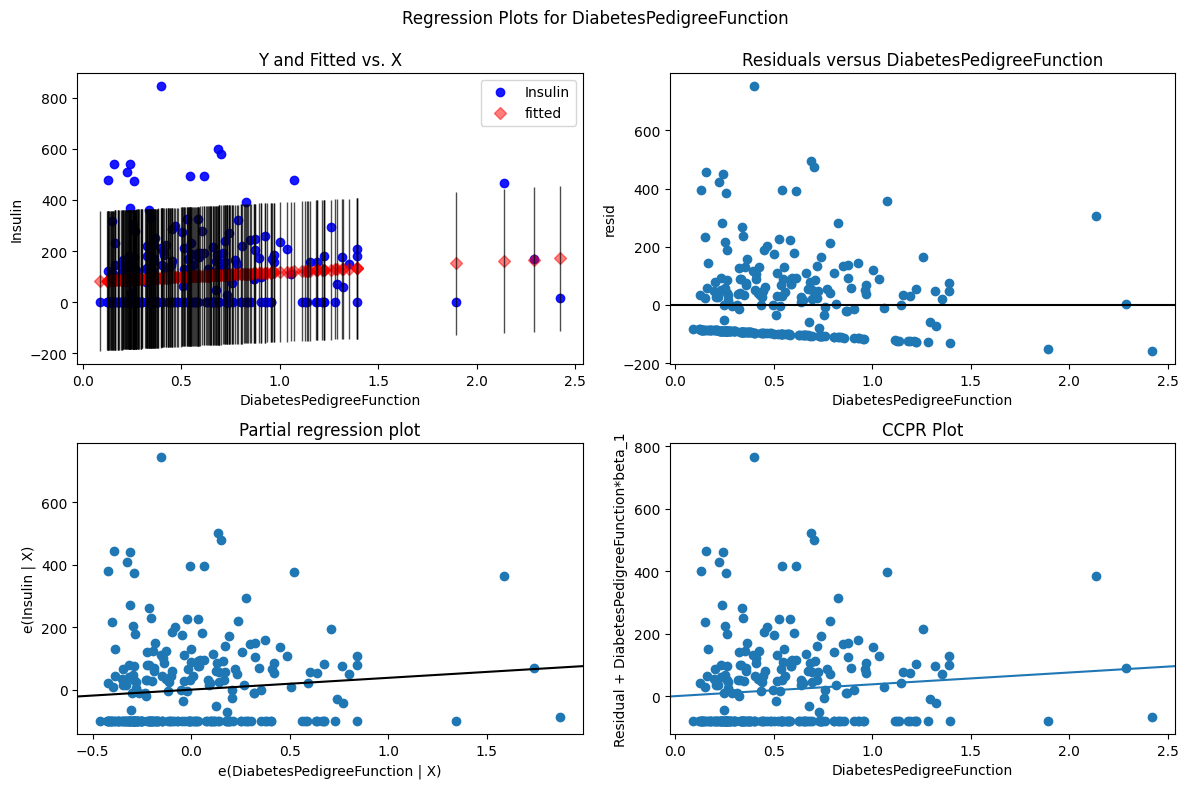

In [23]:
## Dibuje los residuos del modelo que usa DiabetesPedigreeFunction para predecir la insulina.

# Define el tamaño de la figura
fig = plt.figure(figsize=(12,8))

# Produce gráficas de regresión
fig = sm.graphics.plot_regress_exog(model, independent, fig=fig)

#### El mejor modelo es el que usa **grosor de piel** para predecir la insulina. Su R² es **0.208** y todos sus coeficientes son significativos.

## Regresión lineal múltiple



In [24]:
## Construya un modelo de regresión lineal múltiple con todas las variables.
feature_cols = [ 'Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure']

df_3 = df_2

X = df_3[feature_cols] # Características (variables independientes)
y = df_3.Insulin # Variable objetivo

In [25]:
import statsmodels.api as sm
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     14.75
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           3.56e-16
Time:                        03:07:44   Log-Likelihood:                -1656.8
No. Observations:                 268   AIC:                             3330.
Df Residuals:                     260   BIC:                             3358.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -62.1602     56.833     -1.094      0.275    -174.073      49.752
Glucose                      1.0458      0.231      4.527      0.000       0.591       1.501
BMI                         -1.9586      1.084     -1.807      0.072      -4.093       0.176
Age                          0.7957      0.784      1.015      0.311      -0.748       2.339
DiabetesPedigreeFunction    -8.9662     20.395     -0.440      0.661     -49.127      31.194
SkinThickness                3.8721      0.458      8.462      0.000       2.971       4.773
Pregnancies                 -2.5319      2.194     -1.154      0.250      -6.852       1.788
BloodPressure               -0.2042      0.367     -0.557      0.578      -0.926       0.518
==============================================================================
Omnibus:                       95.750   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.256
Skew:                           1.354   Prob(JB):                    1.28e-107
Kurtosis:                       9.062   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Responda las siguientes preguntas:
- ¿Son significativos todos los coeficientes?

  *Solo Glucose y SkinThickness son estadísticamente significativos al nivel de 5%*
- ¿Existe evidencia de multicolinealidad?

  *Si, el valor alto de condition number indica multicolinealidad*

### Eliminación la multicolinealidad

In [26]:
## Reordena las columnas estableciendo "Insulina" como última columna
df_3 = df_3[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure','Insulin']]


In [27]:
## Identifica la colinealidad de cada predictor mediante VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

## Imprimir el coeficiente VIF del dataframe, excepto el de la última columna.
## Un VIF > 10 indica alta multicolinealidad
def printVIF(df):
    for i in range(len(df.columns[:-1])):
        v = vif(np.matrix(df[:-1]),i)
        print("VIF for {}: {}".format(df.columns[i],round(v,2)))


In [28]:
printVIF(df_3)

VIF for Glucose: 17.69
VIF for BMI: 18.12
VIF for Age: 15.28
VIF for DiabetesPedigreeFunction: 3.41
VIF for SkinThickness: 4.06
VIF for Pregnancies: 3.47
VIF for BloodPressure: 13.51


#### Responda las siguientes preguntas:
- ¿Qué variables tienen un VIF superior a 10?

  *Glucose, BMI, Age, BloodPressure*

- ¿Qué variables con un valor p alto deberían eliminarse?

  *DiabetesPedegreeFunction, Age, Pregnancies, BloodPressure y posiblemente BMI*

- ¿Qué variables recomendaría VIF eliminar?

  *Age, BloodPressure y posiblemente BMI*

In [29]:
# Elimina la presión arterial
df_4 = df_3[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df_4)

VIF for Glucose: 17.34
VIF for BMI: 16.54
VIF for Age: 13.34
VIF for DiabetesPedigreeFunction: 3.41
VIF for SkinThickness: 3.9
VIF for Pregnancies: 3.46


In [30]:
# Elimina la glucosa
df_4 = df_3[['BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df_4)

VIF for BMI: 10.62
VIF for Age: 10.91
VIF for DiabetesPedigreeFunction: 3.37
VIF for SkinThickness: 3.83
VIF for Pregnancies: 3.45


#### Responda las siguientes preguntas:
- ¿Por qué cambian todos los coeficientes VIF al eliminar una característica?

  *Las interrelaciones entre las variables restantes se modifican, lo que afecta la forma en que explican la varianza de los datos*

- ¿Podríamos entrenar un modelo sin multicolinealidad con estas 5 variables?

  *Sí, ya que los VIFs están por debajo de 10, aunque los BMI y Age son relativamente altos*

In [31]:
feature_cols = ['BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     15.42
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           2.73e-13
Time:                        03:07:54   Log-Likelihood:                -1667.1
No. Observations:                 268   AIC:                             3346.
Df Residuals:                     262   BIC:                             3368.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       55.4586     50.487      1.098      0.273     -43.953     154.870
BMI                         -1.7902      1.112     -1.610      0.109      -3.979       0.399
Age                          1.1787      0.775      1.522      0.129      -0.346       2.704
DiabetesPedigreeFunction    -7.0214     21.103     -0.333      0.740     -48.574      34.531
SkinThickness                3.8583      0.463      8.339      0.000       2.947       4.769
Pregnancies                 -3.6079      2.257     -1.599      0.111      -8.052       0.836
==============================================================================
Omnibus:                      107.512   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.093
Skew:                           1.596   Prob(JB):                    4.20e-109
Kurtosis:                       8.874   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Responda las siguientes preguntas:
- ¿Sigue existiendo multicolinealidad?

  *Sí, el condition number sigue siendo alto (384)*

- ¿Son significativos todos los coeficientes?

  *No, solo SkinThickness es estadísticamente significativo*

- ¿Es significativa la intersección con el eje X?

  *No, el valor p para la intesección es 0.273 (mayor que 5)*

- ¿Qué variable deberíamos eliminar a continuación?

  *DiabetesPedigreeFunction, ya que tiene un valor p de 0.740*

In [32]:
## Eliminar DiabetesPedigreeFunction
feature_cols = ['BMI', 'Age','SkinThickness','Pregnancies']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     19.31
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           6.07e-14
Time:                        03:07:56   Log-Likelihood:                -1667.1
No. Observations:                 268   AIC:                             3344.
Df Residuals:                     263   BIC:                             3362.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            52.5139     49.621      1.058      0.291     -45.191     150.219
BMI              -1.8066      1.109     -1.629      0.104      -3.990       0.376
Age               1.1899      0.773      1.540      0.125      -0.331       2.711
SkinThickness     3.8208      0.448      8.529      0.000       2.939       4.703
Pregnancies      -3.5932      2.253     -1.595      0.112      -8.029       0.843
==============================================================================
Omnibus:                      107.886   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.934
Skew:                           1.602   Prob(JB):                    1.01e-109
Kurtosis:                       8.890   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
## Eliminar embarazos
feature_cols = ['BMI', 'SkinThickness','Age']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     24.76
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           3.80e-14
Time:                        03:07:57   Log-Likelihood:                -1668.4
No. Observations:                 268   AIC:                             3345.
Df Residuals:                     264   BIC:                             3359.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            49.5188     49.730      0.996      0.320     -48.400     147.437
BMI              -1.6714      1.109     -1.508      0.133      -3.854       0.512
SkinThickness     3.8336      0.449      8.534      0.000       2.949       4.718
Age               0.6633      0.700      0.947      0.345      -0.716       2.042
==============================================================================
Omnibus:                      114.650   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.984
Skew:                           1.692   Prob(JB):                    1.03e-124
Kurtosis:                       9.299   Cond. No.                         375.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
## Eliminar el intercepto
feature_cols = ['BMI', 'SkinThickness','Age']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.486
Model:                            OLS   Adj. R-squared (uncentered):              0.481
Method:                 Least Squares   F-statistic:                              83.66
Date:                Tue, 29 Apr 2025   Prob (F-statistic):                    4.12e-38
Time:                        03:08:00   Log-Likelihood:                         -1668.9
No. Observations:                 268   AIC:                                      3344.
Df Residuals:                     265   BIC:                                      3355.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
BMI              -0.7761      0.649     -1.197      0.233      -2.053       0.501
SkinThickness     3.8259      0.449      8.518      0.000       2.942       4.710
Age               1.1244      0.525      2.140      0.033       0.090       2.159
==============================================================================
Omnibus:                      111.599   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.618
Skew:                           1.644   Prob(JB):                    1.22e-119
Kurtosis:                       9.183   Cond. No.                         6.20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
## Eliminar el IMC
feature_cols = ['SkinThickness','Age']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.484
Model:                            OLS   Adj. R-squared (uncentered):              0.480
Method:                 Least Squares   F-statistic:                              124.6
Date:                Tue, 29 Apr 2025   Prob (F-statistic):                    6.63e-39
Time:                        03:08:02   Log-Likelihood:                         -1669.6
No. Observations:                 268   AIC:                                      3343.
Df Residuals:                     266   BIC:                                      3350.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SkinThickness     3.5618      0.392      9.098      0.000       2.791       4.333
Age               0.5975      0.287      2.082      0.038       0.032       1.163
==============================================================================
Omnibus:                      118.886   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.813
Skew:                           1.759   Prob(JB):                    7.65e-132
Kurtosis:                       9.457   Cond. No.                         2.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Answer the following questions:
#### Responda las siguientes preguntas:
- ¿Es significativo este modelo?

  *Si, el F-static tiene un valor p muy bajo, cercano al cero (6.63e-39)*

- ¿Podemos usarlo para predecir el nivel de insulina?

  *el R-scuared es muy bajo, no deberíamos utilizarlo para precedir*

- ¿Cómo es la ecuación del modelo?

  *Insulin=3.5618×SkinThickness+0.5975×Age*

- Revise la evolución del error

  Los esiduos no son normales (alto skewness y kurtosis) y no hay autocorrelación (DW ≈ 2).


### Selección de características



In [38]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
import numpy as np

alphas = np.logspace(-6, 6, 100)

# Ridge con validación cruzada
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X, y)

# Lasso con validación cruzada
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X, y)

# Elastic Net con validación cruzada
elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, max_iter=10000)
elastic_cv.fit(X, y)

# Resultados
print("Ridge R2:", ridge_cv.score(X, y))
print("Lasso R2:", lasso_cv.score(X, y))
print("ElasticNet R2:", elastic_cv.score(X, y))

print("Ridge alpha:", ridge_cv.alpha_)
print("Lasso alpha:", lasso_cv.alpha_)
print("ElasticNet alpha:", elastic_cv.alpha_)

print("Ridge Coef:", ridge_cv.coef_)
print("Lasso Coef:", lasso_cv.coef_)
print("ElasticNet Coef:", elastic_cv.coef_)

Ridge R2: 0.20713606003696838
Lasso R2: 0.20332766798786783
ElasticNet R2: 0.20332766798786783
Ridge alpha: 15199.11082952933
Lasso alpha: 174.7528400007683
ElasticNet alpha: 174.7528400007683
Ridge Coef: [3.05448841 0.51302729]
Lasso Coef: [3.02031153 0.        ]
ElasticNet Coef: [3.02031153 0.        ]


#### Haga modelos con Ridge, LASSO y Elastic Net (con validación cruzada).
#### Conteste las siguientes preguntas:
- ¿Cuáles son los 2 mejores modelos?
  
  *Ridge y Lasso, tienen los valores más altos de R^2, aunque ElasticNet tiene el mismo valor R^2 que Lasso*

- ¿Cuál de estos modelos es el mejor (de acuerdo al R2 y la F-statistic)?

  *Ridge, que tiene el R^2 más alto, con un mejor ajuste en comparación con Lasso y ElasticNet*

- ¿Cuáles parecen ser los coeficientes más relevantes?

  *El de SkinThickness, en Lasso y ElasticNet solo SkinThickness tiene un coeficiente distinto a 0, en Ridge ambos son distintos de cero, pero SkinThickness es mucho mayor a Age*